I hope this analysis is informative. Do post your reviews and upvote if you like it!!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [2]:
placement = pd.read_csv("/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
placement.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Lets analyze the individual variables

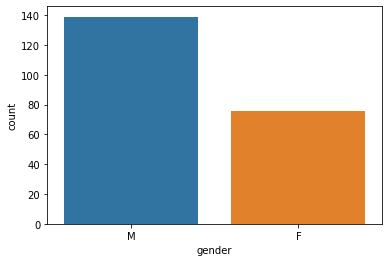

In [5]:
sns.countplot(data=placement , x ="gender")
plt.show()

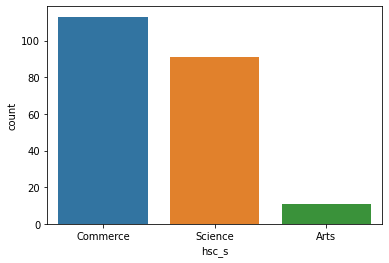

In [6]:
sns.countplot(data=placement , x ="hsc_s")
plt.show()

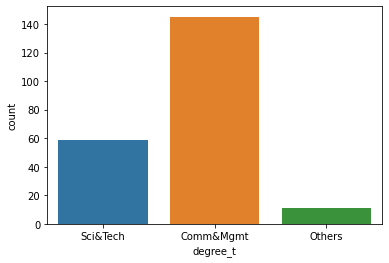

In [7]:
sns.countplot(data=placement , x = "degree_t")
plt.show()

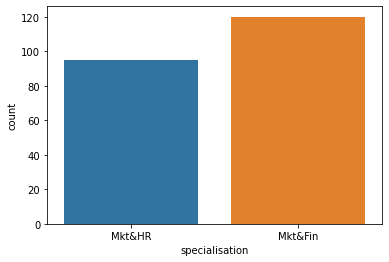

In [8]:
sns.countplot(data=placement , x = "specialisation")
plt.show()

In [9]:
placement.status.value_counts(normalize = True)

Placed        0.688372
Not Placed    0.311628
Name: status, dtype: float64

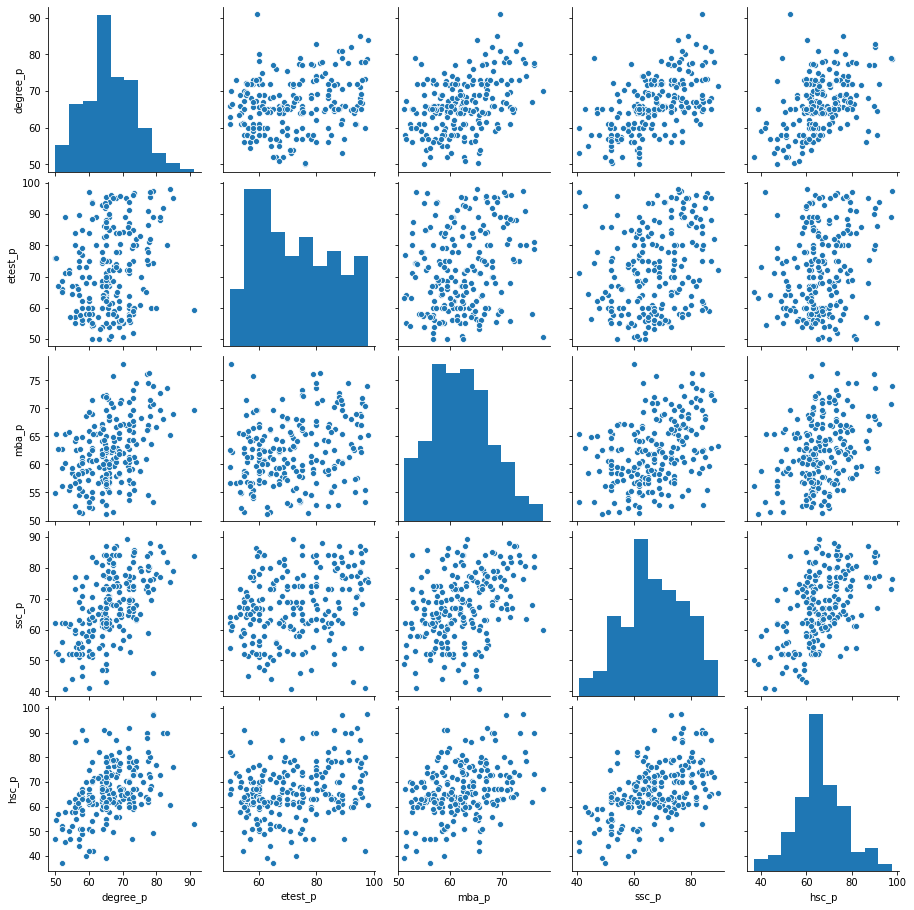

In [10]:
sns.pairplot(data = placement , vars = ["degree_p" , "etest_p" , "mba_p" , "ssc_p" , "hsc_p"])
plt.show()

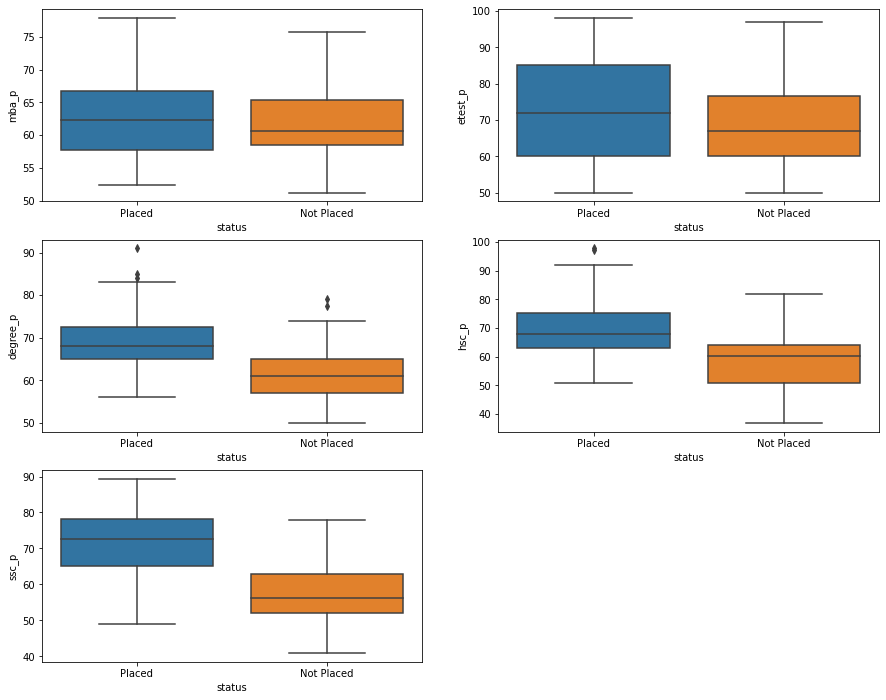

In [11]:
plt.figure(figsize = [15,12])
plt.subplot(3,2,1)
sns.boxplot(data=placement , x ="status" , y ="mba_p")
plt.subplot(3,2,2)
sns.boxplot(data=placement , x ="status" , y ="etest_p")
plt.subplot(3,2,3)
sns.boxplot(data=placement , x ="status" , y ="degree_p")
plt.subplot(3,2,4)
sns.boxplot(data=placement , x ="status" , y ="hsc_p")
plt.subplot(3,2,5)
sns.boxplot(data=placement , x ="status" , y ="ssc_p")
plt.show()

* In this we can say that candidates who have scored below 50% in SSC & HSC do not get placed where as candidates scoring above 78% in SSC and 80% in HSC will be surely placed
* Those candidates who have their degree % above 75 are most likely to get placed
* candidates scoring above 75% in mba are most likely to get placed 

For the rest of the scores it cant be predicted. 
Therefore we cannot say if the placement criteria depends on the percentage score 

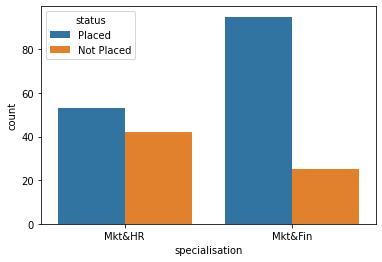

In [12]:
sns.countplot(x = "specialisation" , hue = "status" , data =placement)
plt.show()

Here we can see that students who have done their MBA with specialisation in marketing and Finance are have a good amount of people getting placed 
Whereas we can see equal propotion of placed and unplaced students in Marketing and Hr specialisation

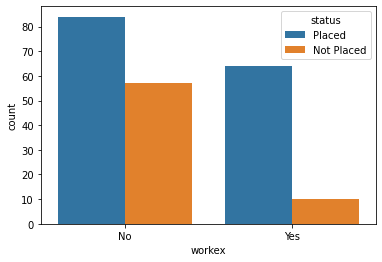

In [13]:
sns.countplot(x = "workex" , hue = "status" , data =placement)
plt.show()

* This says there are more number of students getting placed with no workex. However we can also see almost equal proportion of people with no workex do not getting placed  
* Although the number of people having workex is less but their chances of getting placed is higher 




Previously we saw that students who have done their specialisation in marketing and finance domain are maximum and their chances of getting placed is high as well. 

Lets find out what type of students are most likely to choose this specialisation

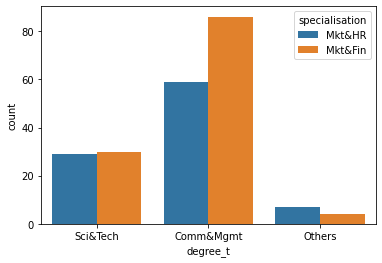

In [14]:
sns.countplot(x = "degree_t" , hue ="specialisation" , data=placement)
plt.show()

As we can see that those who have done their graduation in commerce and management are more inclined towards specialisation in Marketing and finance whereas we can see equal number of Science and technology grads opting for these two specialisations

So again the question arises which type of students opt for their graduation in commerce and management.  

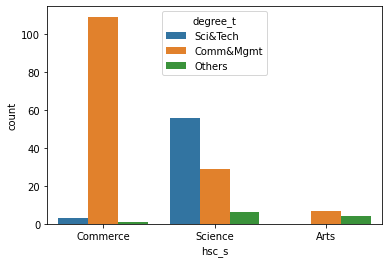

In [15]:
sns.countplot(x="hsc_s" , hue = "degree_t" , data=placement)
plt.show()

This is a quite obvious result which was expected. Commerce students most likely persue their graduation in that field whereas students from science background get inclined to taking up graduation in science as well as commerce. 


Now lets try to find out people from which backgroung have work ex

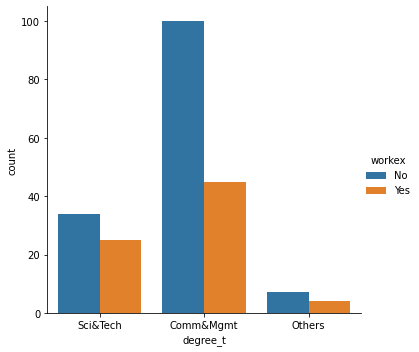

In [16]:
sns.catplot(data=placement , x = "degree_t" , hue = "workex" , kind="count")
plt.show()

From this we can see that students from commerce background most likely take up their post graduation without any workex whereas sudents graduated from science background try to gain some workex. 
But overall most of the candidates do not have any workex 

Lastly lets try to figure out how does the salary vary for different kinds of individuals 

In [17]:
placement.salary.describe()

count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

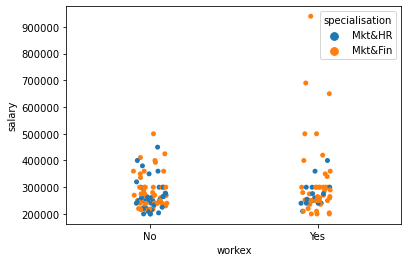

In [18]:
sns.stripplot(data=placement , x = "workex" , y ="salary" , jitter=True , hue = "specialisation")
plt.show()

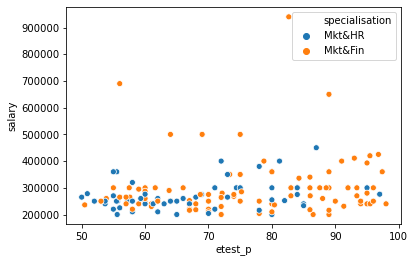

In [19]:
sns.scatterplot(data = placement , x = "etest_p" , y = "salary" , hue = "specialisation")
plt.show()

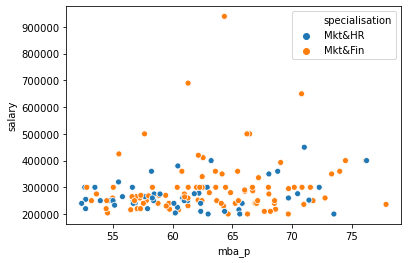

In [20]:
sns.scatterplot(data = placement , x = "mba_p" , y = "salary" , hue="specialisation")
plt.show()

We can see that maximum students are placed with a annual salary of 3 Lakh .
Students who have opted for Marketing and finance specialisation with work experience have got the highest package. Although we can see that the mba percentage for this student is between 60-65% only.

Overall we can say that to some extent the mba % and the test % do affect the salary. But there is no proper trend in which it is varying. 
